# Computer Vision - Convolutional Neural Network

In [2]:
# Importing TF and checking the version
import tensorflow as tf
print(tf.__version__)

2.10.0


In [3]:
# Get data from https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
import zipfile

# Unzip the data
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

In [4]:
# Check the structure
!dir /b pizza_steak

test
train


In [5]:
# Walk through the dir structure
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} files in {dirpath}.")

There are 2 directories and 0 files in pizza_steak.
There are 2 directories and 0 files in pizza_steak\test.
There are 0 directories and 250 files in pizza_steak\test\pizza.
There are 0 directories and 250 files in pizza_steak\test\steak.
There are 2 directories and 0 files in pizza_steak\train.
There are 0 directories and 750 files in pizza_steak\train\pizza.
There are 0 directories and 750 files in pizza_steak\train\steak.


In [6]:
# Another way to find out how many images are in the target directory
num_steak_images_train = len(os.listdir("pizza_steak/train/steak/"))
num_steak_images_train

750

In [7]:
# Get the classnames programmatically
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted(item.name for item in data_dir.glob("*")))
print(class_names)

['pizza' 'steak']


In [8]:
# Function to visialise our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder + "/" + random_image[0])
    
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")
    return img


Image shape: (512, 512, 3)


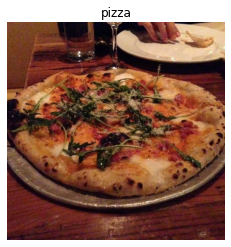

In [9]:
# Viewing random image
img = view_random_image(target_dir="pizza_steak/train/", target_class="pizza")

In [10]:
# Pre-processing image into tensor
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[130,  74,  27],
        [128,  72,  25],
        [142,  85,  42],
        ...,
        [198, 146, 106],
        [201, 145, 110],
        [206, 150, 115]],

       [[131,  74,  29],
        [121,  64,  21],
        [129,  71,  31],
        ...,
        [210, 158, 119],
        [214, 160, 124],
        [214, 160, 124]],

       [[128,  73,  34],
        [116,  61,  22],
        [119,  63,  26],
        ...,
        [219, 167, 130],
        [220, 168, 131],
        [212, 159, 125]],

       ...,

       [[ 35,  19,  32],
        [ 29,  11,  25],
        [ 28,  10,  24],
        ...,
        [ 82,  30,  32],
        [ 80,  28,  32],
        [ 72,  20,  24]],

       [[ 31,  17,  32],
        [ 28,  14,  29],
        [ 33,  16,  32],
        ...,
        [ 75,  25,  28],
        [ 76,  25,  30],
        [ 67,  16,  21]],

       [[ 27,  15,  29],
        [ 27,  15,  29],
        [ 38,  21,  37],
        ...,
        [ 66,  16,  1

In [11]:
# Get all the pixel values between 0 and 1
img / 255.

array([[[0.50980392, 0.29019608, 0.10588235],
        [0.50196078, 0.28235294, 0.09803922],
        [0.55686275, 0.33333333, 0.16470588],
        ...,
        [0.77647059, 0.57254902, 0.41568627],
        [0.78823529, 0.56862745, 0.43137255],
        [0.80784314, 0.58823529, 0.45098039]],

       [[0.51372549, 0.29019608, 0.11372549],
        [0.4745098 , 0.25098039, 0.08235294],
        [0.50588235, 0.27843137, 0.12156863],
        ...,
        [0.82352941, 0.61960784, 0.46666667],
        [0.83921569, 0.62745098, 0.48627451],
        [0.83921569, 0.62745098, 0.48627451]],

       [[0.50196078, 0.28627451, 0.13333333],
        [0.45490196, 0.23921569, 0.08627451],
        [0.46666667, 0.24705882, 0.10196078],
        ...,
        [0.85882353, 0.65490196, 0.50980392],
        [0.8627451 , 0.65882353, 0.51372549],
        [0.83137255, 0.62352941, 0.49019608]],

       ...,

       [[0.1372549 , 0.0745098 , 0.1254902 ],
        [0.11372549, 0.04313725, 0.09803922],
        [0.10980392, 0

## CNN Model - Binary Classification

Image shape: (512, 384, 3)
Image shape: (512, 512, 3)


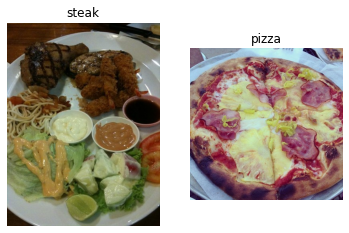

In [12]:
# Visualise data
plt.figure()
plt.subplot(1, 2, 1)
steak_image = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_image = view_random_image("pizza_steak/train/", "pizza")